# Snakes and Ladders

### Here we implement snakes and ladders (S&L) boardgame
This is to study transition matricies and discrete time event simulations

The following features are implemented:
* NxN grid
* S snakes, and L ladders
* snakes and ladders cannot share starting points
* snakes and ladders can share ending points
* Adjacency and Transition matricicies generation
* Plots for visualizing the boardgame

Thereafter, mild analysis is provided.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, ArrowStyle

### Here we collect all the functions and adjust them such that we can easily make new games with different parameterizations

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = 'None'

def show(matrix):
    plt.figure(figsize=(4,4))
    plt.imshow(matrix, cmap='hot')
    plt.xticks([]); plt.yticks([])
    plt.show()

def genT(AM):
    T = []
    for i in AM:
        p = np.random.dirichlet(np.ones(np.sum(i)))
        t = []; count = 0
        for j in range(len(AM)):
            if i[j]: t.append(p[count]); count+=1
            else: t.append(0)
        T.append(t)
    return T

def distribution(T, eps=1e-4):
    D = []
    P0 = np.zeros(len(T))
    P0[0] = 1
    diff = 1
    while diff>eps:
        P1 = np.dot(P0, T)
        diff = np.linalg.norm(P1-P0)
        P0 = P1
        D.append(P0)
    return D

def trajectory(T):
    M = []
    s0 = np.zeros(len(T))
    s0[0] = 1
    while True:
        s1 = np.random.choice(range(len(T)), p=T[np.argmax(s0)])
        s0 = np.zeros(len(T))
        s0[s1] = 1
        M.append(s0)
        if s1 == len(T)-1: break
    return M

def valid(connections):
    X = [i[0] for i in connections]
    Y = [i[1] for i in connections]
    if len(np.unique(X)) != len(Y): return False
    for x in X:
        for y in Y:
            if x==y: return False
    return True

def genA(size, die):
    A = [[0]*(i+1) + [1]*die + [0]*(size-die-(i+1)) for i in range(size)]
    A = [a[:size] for a in A]
    A[size-1][size-1] = 1
    A = np.array(A)
    return A

def genB(size, die, A, s, l):
    snakes = []; ladders = []
    for i in range(1, size-1):
        for j in range(0, i+1):
            if i!=j: snakes.append((i, j))
    for i in range(1, size):
        for j in range(i+1+die, size):
            if i!=j: ladders.append((i, j))
    while True:
        B = np.zeros((size,size),  dtype=int)
        snake = np.random.choice(np.arange(len(snakes)), s, replace=False)
        ladder = np.random.choice(np.arange(len(ladders)), l, replace=False)
        for i in snake: B[snakes[i]] = 1
        for i in ladder: B[ladders[i]] = 1
        if all((np.sum(B[i]) < np.sum(A[i]) for i in range(size-1))):
            connections = [snakes[i] for i in snake]+[ladders[i] for i in ladder]
            if valid(connections): break
    S = [[snakes[s][0] for s in snake], [snakes[s][1] for s in snake]]
    L = [[ladders[l][0] for l in ladder], [ladders[l][1] for l in ladder]]
    return B, S, L

def genC(size, A, B):
    for i in range(size-1):
        if any(B[i]):
            moves = np.where(A[i]==1)[0]
            for m in moves: A[i][m] = 0
    C = A+B
    return C

def pos2point(dimension, pos):
    x = []; y = []
    for p in pos:
        space = 0
        for i in range(dimension):
            for j in range(dimension):
                if space==p: x.append(i); y.append(j)
                space+=1
    return y, x

def create_arrow(start, end, color):
    x1, y1 = start
    x2, y2 = end
    dx = x2 - x1
    dy = y2 - y1
    style = ArrowStyle('simple', head_length=10, head_width=14, tail_width=6)
    arrow = FancyArrowPatch(start, end, fc=color, ec='k', arrowstyle=style, alpha=0.5)                     
    return arrow

def showGame(S, L, path, dimension):
    pathX, pathY = pos2point(dimension, path)
    headX, headY = pos2point(dimension, S[0])
    tailX, tailY = pos2point(dimension, S[1])
    topX, topY = pos2point(dimension, L[0])
    botX, botY = pos2point(dimension, L[1])
    plt.figure(figsize=(4,4))
    plt.imshow(np.zeros((dimension, dimension)), cmap='hot')
    plt.plot(pathX, pathY, c='w', marker='o', ls=':', alpha=0.5)
    for i in range(len(headX)):
        arrow = create_arrow((headX[i], headY[i]), (tailX[i], tailY[i]), 'r')
        plt.gca().add_patch(arrow)
    for i in range(len(topX)):
        arrow = create_arrow((topX[i], topY[i]), (botX[i], botY[i]), 'b')
        plt.gca().add_patch(arrow)
    plt.xticks(np.arange(-.5, dimension, 1), minor=True)
    plt.yticks(np.arange(-.5, dimension, 1), minor=True)
    plt.xticks([]); plt.yticks([])
    ax = plt.gca()
    ax.grid(which='minor', ls='-', lw=2, c='gray', alpha=0.5)
    ax.tick_params(which='both', length=0)
    plt.show()
    
def newGame(size, die, s, l):
    assert np.sqrt(size) == int(np.sqrt(size)), 'size must be square'
    assert die<size, 'requires smaller die'

    A = genA(size, die)
    B, S, L = genB(size, die, A, s, l)
    C = genC(size, A, B)
    T = genT(C)
    M = trajectory(T)
    D = distribution(T)

    path = [0]+[np.argmax(i) for i in M]
    dimension = int(np.sqrt(size))
    showGame(S, L, path, dimension)
    print('rolls:', len(M))
    #print('path:', path)

### Below we can adjust the parameters and generate new games on the fly

10 snakes, 10 ladders


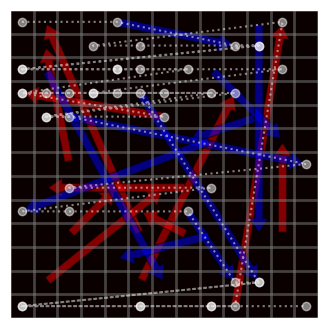

rolls: 46
20 snakes, 0 ladders


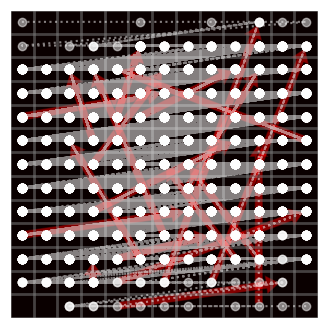

rolls: 7197
0 snakes, 20 ladders


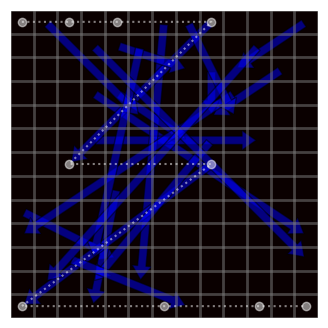

rolls: 9


In [3]:
size = 169
die = 6
labels = ['10 snakes, 10 ladders', '20 snakes, 0 ladders', '0 snakes, 20 ladders']
s = [10, 20, 0]
l = [10, 0, 20]
for i in range(3):
    print(labels[i])
    newGame(size, die, s[i], l[i])

### Now we can do some analysis

First we compare how long it typically takes to finish this game (average rolls per game RPG) with what our distribution function has predicted for that many rolls. We expect to see strong correspondence, especially for simple games.

Average rolls per game = 25.0
Probability at RPG =  0.6


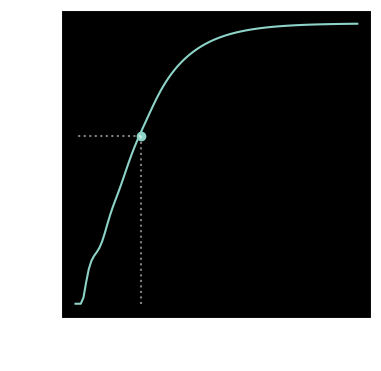

In [4]:
N = 169
s = 10
l = 10
die = 10
A = genA(size, die)
T = genT(A)
B, S, L = genB(size, die, A, s, l)
C = genC(size, A, B)
T = genT(C)
D = distribution(T)

games = [[t for t in trajectory(T)] for i in range(N)]
RPG = np.mean([len(g) for g in games])
print('Average rolls per game =', np.round(RPG))
win = [D[int(np.round(i))][-1] for i in range(len(D))]

try: 
    print('Probability at RPG = ', np.round(win[int(RPG)], 2))
    plt.figure(figsize=(4,4))
    plt.plot(win)
    plt.scatter([RPG], [win[int(RPG)]])
    plt.hlines(win[int(RPG)], RPG, 0, ls=':', alpha=0.5)
    plt.vlines(RPG, 0, win[int(RPG)], ls=':', alpha=0.5)
    plt.ylabel('win odds')
    plt.xlabel('rolls')
    plt.show()
except: print('game took longer than expected')

 As expected, we typically get a probability of ~$63$% for winning for the average number of roles per game, because this is one standard deviation.

In [5]:
###/END